In [8]:
from PIL import Image
import numpy as np

In [9]:
def apply_2d_linear_filter(kernel: np.ndarray, img_array: np.ndarray) -> np.ndarray:
    filter_size = kernel.shape[0]
    offset = filter_size // 2
    filtered_array = np.zeros_like(img_array)

    padded_array = np.pad(img_array, ((offset, offset), (offset, offset)), mode='constant')

    for i in range(offset, padded_array.shape[0]-offset):
        for j in range(offset, padded_array.shape[1]-offset):

            pixel_value = 0
            for k in range(filter_size):
                for l in range(filter_size):
                    pixel_value += kernel[k,l] * padded_array[i-offset+k, j-offset+l]

            pixel_value = max(min(int(pixel_value), 255), 0)
            filtered_array[i-offset, j-offset] = pixel_value

    return filtered_array

In [10]:
sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
emboss_kernel = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

box_blur_kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9

outline_detection_kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

sobel_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

In [11]:
kernels = {
    "sharpen": sharpen_kernel,
    "emboss": emboss_kernel,
    "box_blur": box_blur_kernel,
    "outline_detection": outline_detection_kernel,
    "sobel_kernel": sobel_kernel,
}

In [12]:
image_names = ["images/high_contrast.jpg",
               "images/low_contrast.jpg",
               "images/high_detailed.jpg",
               "images/low_detailed.jpg"]

In [13]:
import os

In [15]:
for n in image_names:
    img = Image.open(n).convert('L')
    img_array = np.asarray(img)


    current_directory = os.getcwd()
    new_folder_path = os.path.join(current_directory, f"{n.rstrip('.jpg')}")
    os.mkdir(new_folder_path)


    for k, v in kernels.items():
        filtered_array = apply_2d_linear_filter(v, img_array)
        filtered_img = Image.fromarray(filtered_array)
        filtered_img.save(f"{n.rstrip('.jpg')}/{k}-kernel-image.jpg")

In [ ]:
### Additional task

In [19]:
!pip install --upgrade matplotlib


[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


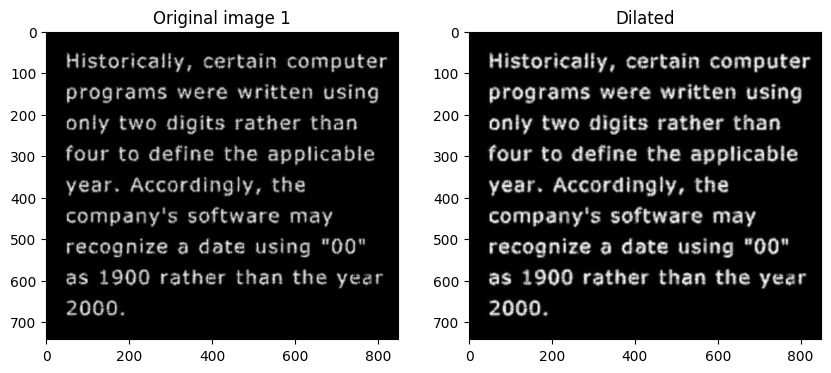

In [21]:
from PIL import Image
import matplotlib.pyplot as plt

add_image_path = "add_image/1.png"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

img = np.array(Image.open(add_image_path).convert('L'))
ax1.imshow(img, cmap="gray")
ax1.set_title("Original image 1")

width, height = img.shape

dilated_image = np.zeros((width, height), dtype=np.uint8)

dilation_structuring_element = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
])

constant = 1

for i in range(constant, width - constant):
  for j in range(constant, height - constant):
    temp = img[i - constant: i + constant + 1, j - constant: j + constant + 1]
    res = temp * dilation_structuring_element

    dilated_image[i, j] = np.max(res)

ax2.imshow(dilated_image, cmap="gray")
ax2.set_title("Dilated")

plt.show()